In [1]:
import xarray as xr 
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('/home/links/ct715/eddy_feedback/')
import functions.eddy_feedback as ef 
import functions.plotting as plot 
import functions.data_wrangling as data 
import functions.aos_functions as aos

import matplotlib.patches as patches

import warnings
warnings.filterwarnings('ignore', category=xr.SerializationWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning, message="invalid value encountered in divide")

In [2]:
# ds1 = xr.open_mfdataset('/home/links/ct715/data_storage/reanalysis/srip_datasets/era_int_TEM_ubar_div1.nc',
#                         parallel=True, chunks={'time':31})
# ds2 = xr.open_mfdataset('/home/links/ct715/data_storage/reanalysis/srip_datasets/jra55_TEM_ubar_div1.nc',
#                         parallel=True, chunks={'time':31})
# ds3 = xr.open_mfdataset('/home/links/ct715/data_storage/reanalysis/srip_datasets/ncep_ncar_TEM_ubar_div1.nc',
#                         parallel=True, chunks={'time':31})

# ds1 = ds1.where(ds1.pressure < 1000., drop=True)
# ds2 = ds2.where(ds2.pressure < 1000., drop=True)
# ds3 = ds3.where(ds3.pressure < 1000., drop=True)

# ds1 = data.seasonal_mean(ds1)
# ds2 = data.seasonal_mean(ds2)
# ds3 = data.seasonal_mean(ds3) 

# ds1 

In [3]:
# ds = xr.open_mfdataset('/home/links/ct715/data_storage/reanalysis/srip_datasets/jra55_TEM_ubar_div1.nc',
#                         parallel=True, chunks={'time':31})
ds = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/reanalysis_data/srip_datasets/jra55_TEM_ubar_div1.nc',
                        parallel=True, chunks={'time':31})

ds = ds.sel(time=slice('1979', '2016'))

ds_NH = data.seasonal_mean(ds, season='djf')
ds_SH = data.seasonal_mean(ds, season='jas')

ds_NH 

<xarray.Dataset>
Dimensions:  (time: 39, level: 22, lat: 73)
Coordinates:
  * level    (level) float32 1e+03 925.0 850.0 700.0 600.0 ... 5.0 3.0 2.0 1.0
  * lat      (lat) float32 -90.0 -87.5 -85.0 -82.5 -80.0 ... 82.5 85.0 87.5 90.0
  * time     (time) datetime64[ns] 1978-12-01 1979-12-01 ... 2016-12-01
Data variables:
    ubar     (time, level, lat) float32 4.094e-06 -2.326 ... 8.936 -0.0001013
    div1_pr  (time, level, lat) float32 nan nan nan nan nan ... nan nan nan nan
    div1_qg  (time, level, lat) float32 nan nan -2.248e-05 ... 7.282e-05 nan nan

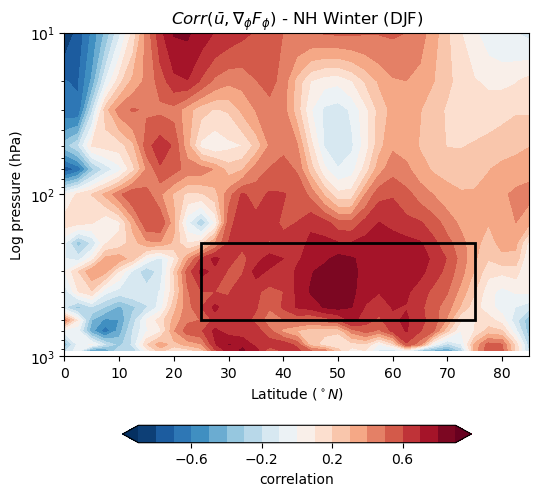

In [4]:
plot.plot_reanalysis_correlation(ds_NH, top_atmos=10., cut_poles=True, take_seasonal=False,
                                 label='NH Winter (DJF)')

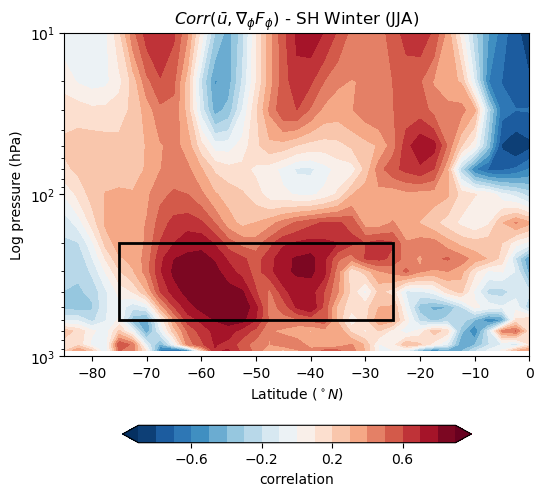

In [5]:
plot.plot_reanalysis_correlation(ds_SH, top_atmos=10., cut_poles=True, take_seasonal=False,
                                 latitude='SH', label='SH Winter (JJA)')

In [6]:
corr_NH = xr.corr(ds_NH.div1_pr, ds_NH.ubar, dim='time')
corr_NH = corr_NH.sel(lat=slice(0,85))
corr_NH = corr_NH.sel(level=slice(1000.,10.))

corr_SH = xr.corr(ds_SH.div1_pr, ds_SH.ubar, dim='time')
corr_SH = corr_SH.sel(lat=slice(-85,0))
corr_SH = corr_SH.sel(level=slice(1000.,10.)) 

corr_SH = corr_SH.fillna(0)
corr_NH = corr_NH.fillna(0)

# Cambridge ML Workshop - March 2024

(10.708661417322835, 5.708661417322834)


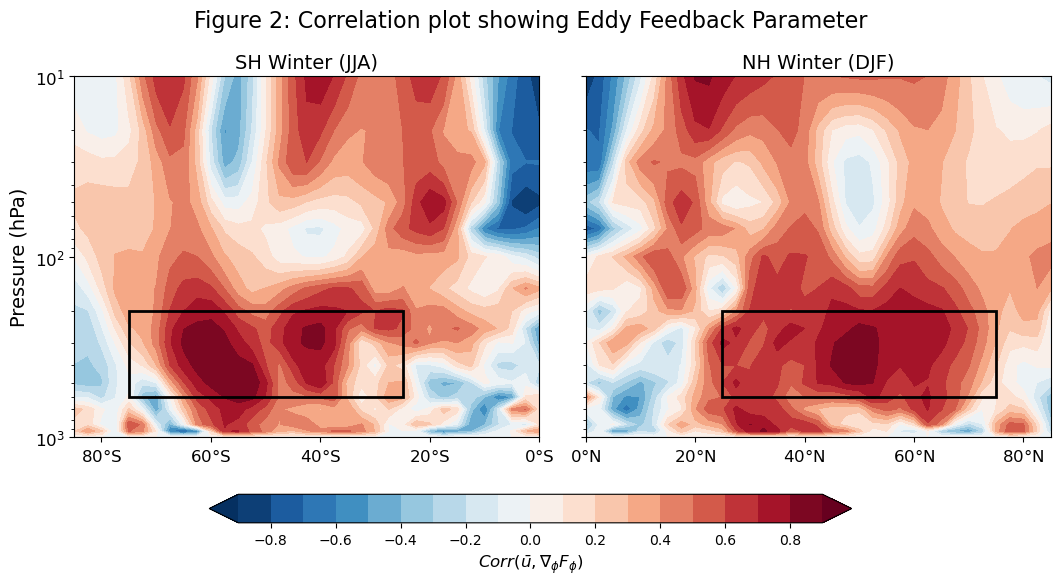

In [7]:
# I want 250x150mm box 
inches = 1/25.4 
figsize = (272*inches, 145*inches)
print(figsize)

fig, (ax1, ax2) = plt.subplots(figsize=figsize, ncols=2, sharey=True)

# SH Winter (JJA)
color1 = ax1.contourf(corr_SH.lat.values, corr_SH.level.values, corr_SH,
             cmap='RdBu_r', levels=np.linspace(-0.9,0.9,19), extend='both')
ax1.set_yscale('log')
ax1.invert_yaxis() 

# set titles and labels
ax1.set_ylabel('Pressure (hPa)', fontsize=14)
# Remove existing ticks and labels set by the xarray function
ax1.set_xticks([])
ax1.set_yticks([])
ax1.yaxis.set_major_locator(plt.NullLocator())
ax1.yaxis.set_minor_locator(plt.NullLocator())
# name tick labels
ax1.set_xticks([0, -20, -40, -60, -80])
ax1.set_xticklabels(['0$\\degree$S', '20$\\degree$S', '40$\\degree$S', '60$\\degree$S', '80$\\degree$S'], fontsize=12)
ax1.set_yticks([1000., 100., 10.])
ax1.set_yticklabels(['1000', '100', '10'], fontsize=12)

ax1.set_title('SH Winter (JJA)', fontsize=14)
ax1.add_patch(patches.Rectangle((-75., 600.), 50, -400, 
                         fill=False, linewidth=2))

# NH Winter (DJF)
color2 = ax2.contourf(corr_NH.lat.values, corr_NH.level.values, corr_NH,
             cmap='RdBu_r', levels=np.linspace(-0.9,0.9,19), extend='both') 
ax2.set_yscale('log')

# set titles and labels
ax2.set_title('NH Winter (DJF)', fontsize=14)
ax2.set_xticks([0, 20, 40, 60, 80])
ax2.set_xticklabels(['0$\\degree$N', '20$\\degree$N', '40$\\degree$N', '60$\\degree$N', '80$\\degree$N'], fontsize=12)

ax2.add_patch(patches.Rectangle((25., 600.), 50, -400, 
                         fill=False, linewidth=2))

plt.tight_layout()

# colourbar
fig.subplots_adjust(bottom=0.3)
cbar_ax = fig.add_axes([0.2, 0.15, 0.6, 0.05])
cbar = fig.colorbar(color1, cax=cbar_ax, location='bottom')
cbar.set_label('$Corr(\\bar{u}, \\nabla_{\\phi} F_{\\phi})$', fontsize=12)
cbar.ax.tick_params(axis='x', labelsize=10)

fig.suptitle('Figure 2: Correlation plot showing Eddy Feedback Parameter', fontsize=16, y=1.05)
plt.show()

# RMetS and AOFD - June 2024

(5.905511811023622, 5.905511811023622)


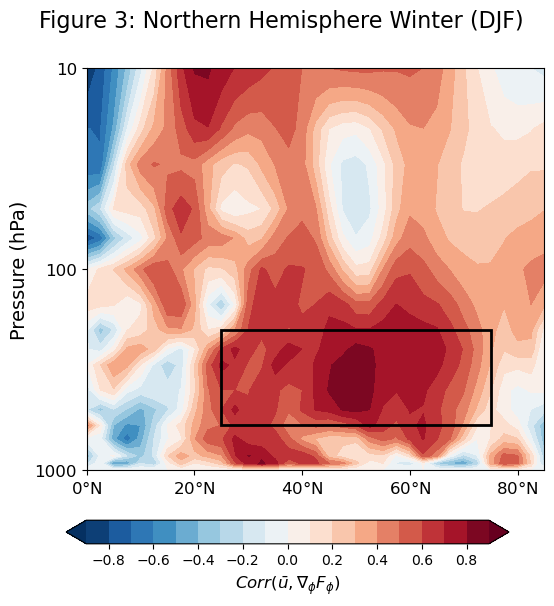

In [8]:
# Convert from mm to inches
inches = 1/25.4 
figsize = (150*inches, 150*inches)
print(figsize)

fig, (ax1) = plt.subplots(figsize=figsize, ncols=1, sharey=True)

# NH Winter (DJF)
color2 = ax1.contourf(corr_NH.lat.values, corr_NH.level.values, corr_NH,
             cmap='RdBu_r', levels=np.linspace(-0.9,0.9,19), extend='both') 
ax1.set_yscale('log')
ax1.invert_yaxis() 

# set titles and labels
# ax1.set_title('Figure 3: Northern Hemisphere Winter (DJF)', fontsize=16, pad=20)
fig.suptitle('Figure 3: Northern Hemisphere Winter (DJF)', x=0.455, fontsize=16)
# ax1.set_xlabel('Latitude', fontsize=14)
ax1.set_ylabel('Pressure (hPa)', fontsize=14)
# Remove existing ticks and labels set by the xarray function
ax1.set_xticks([])
ax1.set_yticks([])
ax1.yaxis.set_major_locator(plt.NullLocator())
ax1.yaxis.set_minor_locator(plt.NullLocator())
# name tick labels
ax1.set_xticks([0, 20, 40, 60, 80])
ax1.set_xticklabels(['0$\\degree$N', '20$\\degree$N', '40$\\degree$N', '60$\\degree$N', '80$\\degree$N'], fontsize=12)
ax1.set_yticks([1000., 100., 10.])
ax1.set_yticklabels(['1000', '100', '10'], fontsize=12)

# insert rectangle
ax1.add_patch(patches.Rectangle((25., 600.), 50, -400, 
                         fill=False, linewidth=2))

# colourbar
fig.subplots_adjust(bottom=0.2)
cbar_ax = fig.add_axes([0.09, 0.075, 0.75, 0.04]) # rect : [left, bottom, width, height]
cbar = fig.colorbar(color1, cax=cbar_ax, location='bottom')
cbar.set_label('$Corr(\\bar{u}, \\nabla_{\\phi} F_{\\phi})$', fontsize=12)
cbar.ax.tick_params(axis='x', labelsize=10)

plt.show()

(5.905511811023622, 5.905511811023622)


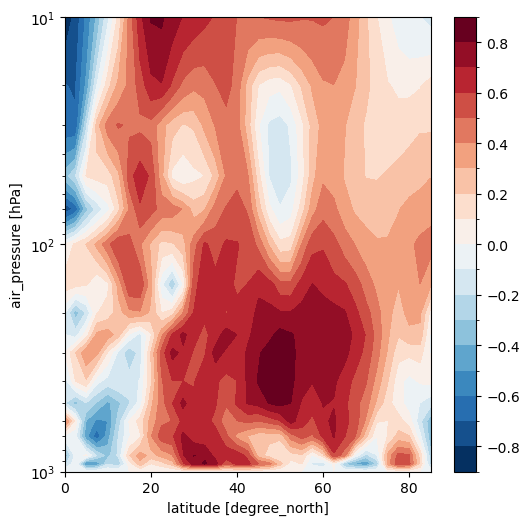

In [9]:
# Convert from mm to inches
inches = 1/25.4 
figsize = (150*inches, 150*inches)
print(figsize)

fig, (ax1) = plt.subplots(figsize=figsize, ncols=1)

corr_NH.plot.contourf(ax=ax1, levels=20, yincrease=False, yscale='log')

## NH Winter jet position difference

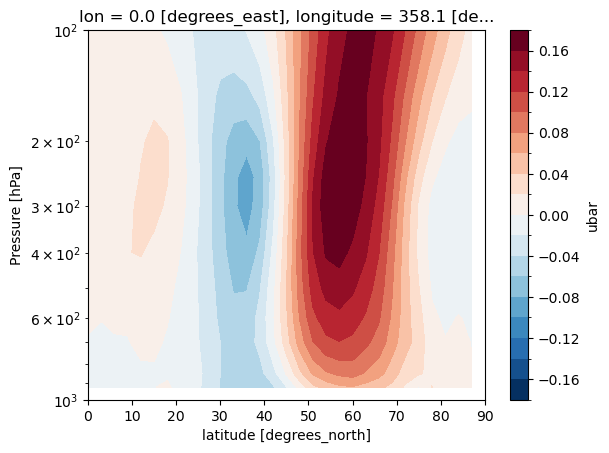

In [10]:
diff_NH = xr.open_mfdataset('/home/users/cturrell/documents/eddy_feedback/plots/ubar-diff_model-mean_pd-futArc.nc')
diff_NH.ubar.plot.contourf(levels=20, yincrease=False, yscale='log')

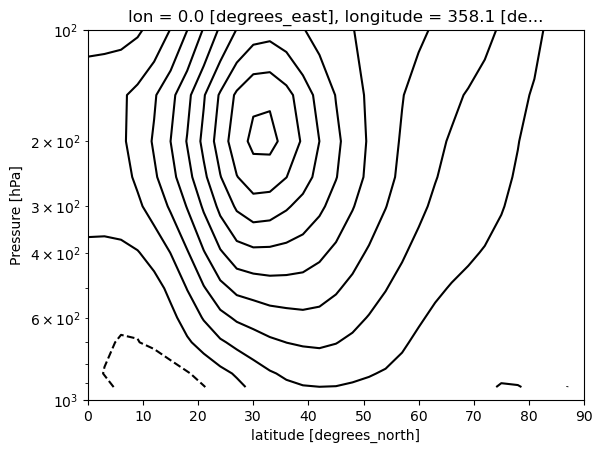

In [11]:
pd_ubar = xr.open_mfdataset('/home/users/cturrell/documents/eddy_feedback/plots/ubar_pdSST-pdSIC_model-mean.nc')
pd_ubar = pd_ubar.sel(level=slice(1000,100))
pd_ubar.ubar.plot.contour(levels=20, yincrease=False, yscale='log', colors='k')

In [12]:
diff_NH.level

<xarray.DataArray 'level' (level: 12)>
array([1000.,  925.,  850.,  700.,  600.,  500.,  400.,  300.,  250.,  200.,
        150.,  100.])
Coordinates:
  * level      (level) float64 1e+03 925.0 850.0 700.0 ... 200.0 150.0 100.0
    lon        float32 ...
    longitude  float32 ...
Attributes:
    standard_name:  air_pressure
    long_name:      Pressure
    units:          hPa
    positive:       down
    axis:           Z

(6.653543307086614, 6.535433070866142)


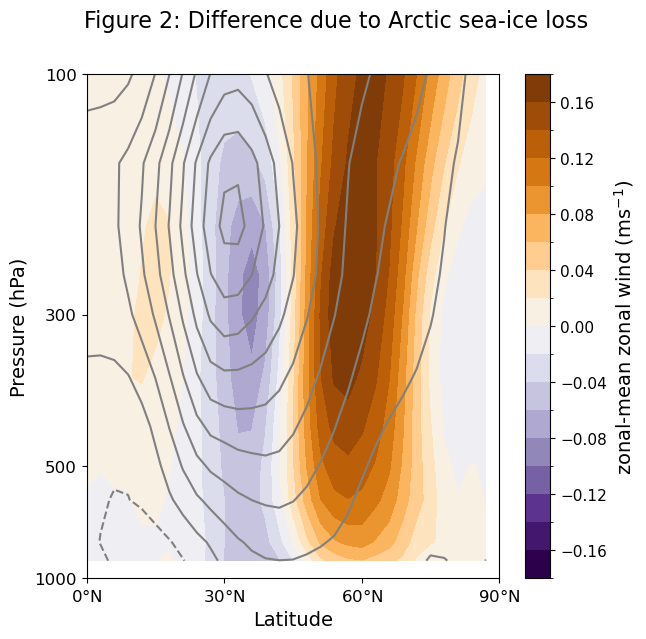

In [13]:
# Convert from mm to inches
height = 169 #(335/4)*3
width = 166 #(180/4)*3

inches = 1/25.4 
figsize = (height*inches, width*inches)
print(figsize)

fig, (ax1) = plt.subplots(figsize=figsize, ncols=1)

pd_ubar.ubar.plot.contour(ax=ax1, levels=20, yincrease=False, yscale='log', colors='gray')
diff_NH.ubar.plot.contourf(ax=ax1, levels=20, yincrease=False, yscale='log', cmap='PuOr_r',
                           cbar_kwargs={'label': 'zonal-mean zonal wind (ms$^{-1}$)'})

# set titles and labels
# ax1.set_title('Figure 1: Difference due to Arctic sea-ice loss', fontsize=16, pad=20)
fig.suptitle('Figure 2: Difference due to Arctic sea-ice loss', fontsize=16, x=0.5)
ax1.set_title('')

ax1.set_xlabel('Latitude', fontsize=14)
ax1.set_ylabel('Pressure (hPa)', fontsize=14)
# Remove existing ticks and labels set by the xarray function
ax1.set_xticks([])
ax1.set_yticks([])
ax1.yaxis.set_major_locator(plt.NullLocator())
ax1.yaxis.set_minor_locator(plt.NullLocator())
# name tick labels
ax1.set_xticks([0, 30, 60, 90])
ax1.set_xticklabels(['0$\\degree$N', '30$\\degree$N', '60$\\degree$N', '90$\\degree$N'], fontsize=12)
ax1.set_yticks([1000., 600., 300., 100.])
ax1.set_yticklabels(['1000', '500', '300', '100'], fontsize=12)

# Set fontsize for colorbar label
cbar = ax1.collections[1].colorbar
cbar.ax.yaxis.label.set_fontsize(14)
cbar.ax.yaxis.set_tick_params(labelsize=11)

plt.show()

In [14]:
# height = (335/4)*3
# width = (180/4)*3

# inches = 1/25.4 
# figsize = (height*inches, width*inches)
# print(figsize)

## NH Jet Shifts vs Eddy Feedback Parameter

In [15]:
import pandas as pd
import scipy as sp 
import seaborn as sns

df_fabricated = pd.read_csv('fabricated_data.csv')
df_fabricated

,Model,NH Feedback (DJF),SH Feedback (JAS),NH jet shift
0,CanESM5,0.4255,0.4634,-0.76
1,CESM2,0.3978,0.3548,-0.64
2,CNRM-CM6-1,0.2733,0.2386,-0.60
3,EC-EARTH3,0.3365,0.3480,-0.48
4,FGOALS-f3-L,0.2621,0.1420,-0.32
5,HadGEM3-GC31-MM,0.3616,0.3474,-0.81
6,IPSL-CM6A-LR,0.3099,0.2262,-0.47
7,MIROC6,0.2469,0.3547,-0.39
8,NorESM2-LM,0.3354,0.3837,-0.40
9,OpenIFS-159,0.3636,0.3588,-0.51


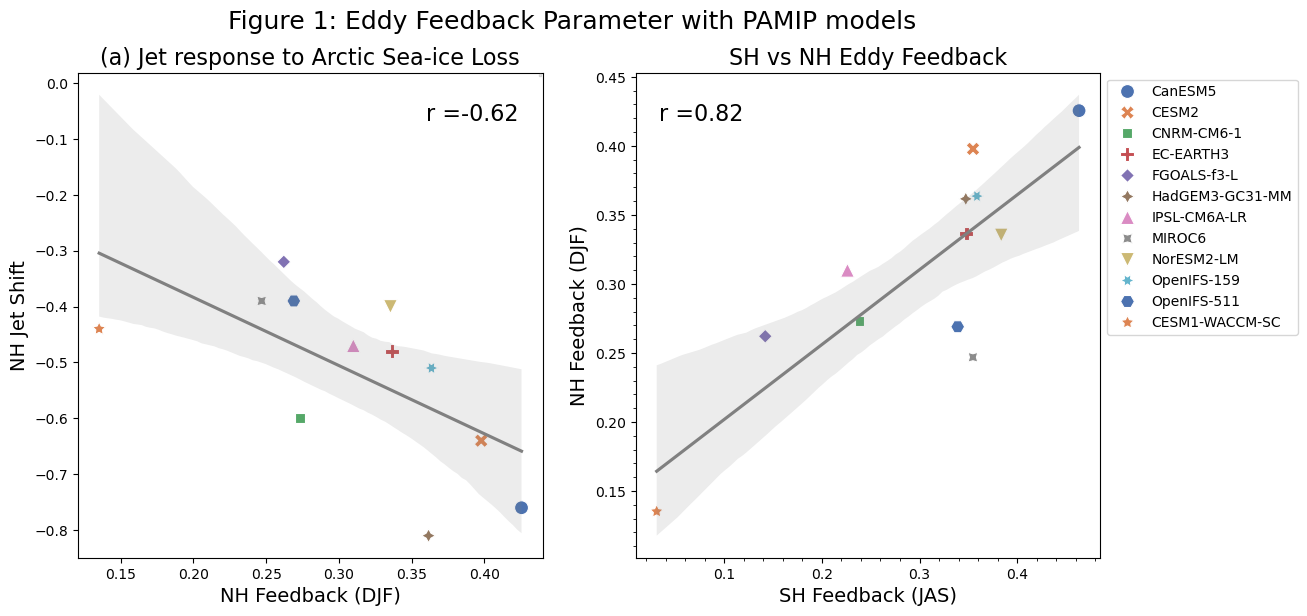

In [45]:
height = 335 #(335/4)*3
width = 160 #(160/4)*3
inches = 1/25.4 
figsize = (height*inches, width*inches)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=figsize)

## FIGURE 1

scatter_plot1 = sns.scatterplot(
    x='NH Feedback (DJF)', 
    y='NH jet shift', 
    hue='Model', 
    style='Model', 
    data=df_fabricated, 
    palette='deep', 
    markers=True, 
    s=100,
    ax=ax1
)
# Plot the regression line
sns.regplot(
    x='NH Feedback (DJF)', 
    y='NH jet shift', 
    data=df_fabricated, 
    line_kws={"color": "gray"},
    scatter=False, 
    ax=scatter_plot1
)
ax1.legend([], fontsize=2)
ax1.set_xlabel('NH Feedback (DJF)', fontsize=14)
ax1.set_ylabel('NH Jet Shift', fontsize=14)
ax1.set_title('(a) Jet response to Arctic Sea-ice Loss', fontsize=16)

# Insert Pearson's correlation
r1, p1 = sp.stats.pearsonr(x=df_fabricated['NH Feedback (DJF)'], y=df_fabricated['NH jet shift'])
ax = plt.gca()
plt.text(-0.45, .9, "r ={:.2f}".format(r1), transform=ax.transAxes, fontsize=16)


## FIGURE 2

scatter_plot2 = sns.scatterplot(
    y='NH Feedback (DJF)', 
    x='SH Feedback (JAS)', 
    hue='Model', 
    style='Model', 
    data=df_fabricated, 
    palette='deep', 
    markers=True, 
    s=100,
    ax=ax2
)
# Plot the regression line
sns.regplot(
    y='NH Feedback (DJF)', 
    x='SH Feedback (JAS)', 
    line_kws={"color": "gray"},
    data=df_fabricated, 
    scatter=False, 
    ax=scatter_plot2
)
ax2.set_xlabel('SH Feedback (JAS)', fontsize=14)
ax2.set_ylabel('NH Feedback (DJF)', fontsize=14)
ax2.set_title('SH vs NH Eddy Feedback', fontsize=16)

# Insert Pearson's correlation
r2, p2 = sp.stats.pearsonr(x=df_fabricated['SH Feedback (JAS)'], y=df_fabricated['NH Feedback (DJF)'])
ax = plt.gca()
plt.text(.05, .9, "r ={:.2f}".format(r2), transform=ax.transAxes, fontsize=16)

fig.suptitle('Figure 1: Eddy Feedback Parameter with PAMIP models', fontsize=18)
plt.minorticks_on()
plt.legend(bbox_to_anchor=(1,1))
plt.show()